In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install brokenaxes
clear_output()

In [ ]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import random
from matplotlib import colors as mcolors
from brokenaxes import brokenaxes

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

np.random.seed(20)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/testing_input_data_100_hf.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/testing_output_data_100_hf.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/testing_input_data_100_lf.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/testing_output_data_100_lf.npy

clear_output()

In [ ]:
# Additional samples for HF and LF, with the particularity that each Xi is the same for both, could serve as a Testing or Validation Data
X_hf_100 = np.load('testing_input_data_100_hf.npy')
Y_hf_100 = np.load('testing_output_data_100_hf.npy')

X_lf_100 = np.load('testing_input_data_100_lf.npy')
Y_lf_100 = np.load('testing_output_data_100_lf.npy')

print("Testing X HF size :", X_hf_100.shape)
print("Testing Y HF size :", Y_hf_100.shape)
print("Testing X LF size :", X_lf_100.shape)
print("Testing Y LF size :", Y_lf_100.shape)

X HF size : (20, 6)
Y HF size : (20, 2)
X LF size : (200, 6)
Y LF size : (200, 2)

Additional X HF size : (100, 6)
Additional Y HF size : (100, 2)
Additional X LF size : (100, 6)
Additional Y LF size : (100, 2)


In [ ]:
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/NN_C.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/NN_R.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/sfGP_C.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/sfGP_R.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/mfGP_C.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/mfGP_R.npy

clear_output()

In [ ]:
NN_C = np.load('NN_C.npy')
NN_R = np.load('NN_R.npy')

gp_C = np.squeeze(np.load('sfGP_C'))
gp_R = np.squeeze(np.load('sfGP_R'))

mfgp_C = np.squeeze(np.load('mfGP_C'))
mfgp_R = np.squeeze(np.load('mfGP_R'))

lf_C = mfgp_C[:100]
hf_C = mfgp_C[100:]
lf_R = mfgp_R[:100]
hf_R = mfgp_R[100:]

In [ ]:
cmap_2 = plt.cm.get_cmap('GnBu')

rgba_4 = cmap_2(0.99)
rgba_5 = cmap_2(0.7)
rgba_6 = cmap_2(0.75)

<ipython-input-11-0124ba55b3c2>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_2 = plt.cm.get_cmap('GnBu')


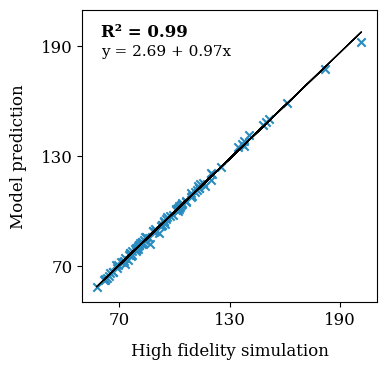

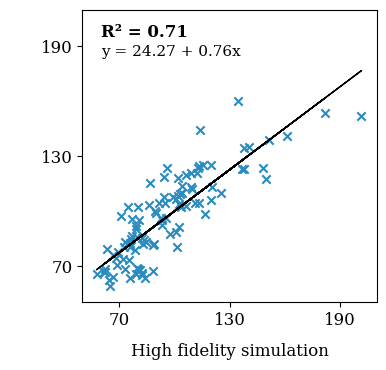

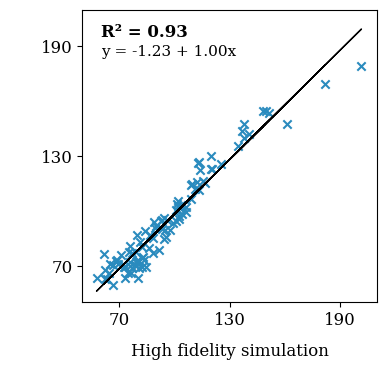

In [ ]:
# Graficos Compliance

si = 12
# MFGP
plt.figure(figsize=(3.8,3.8))
plt.scatter(Y_hf_100[:,1], hf_C, color = rgba_6, marker = 'x')
plt.xlabel('High fidelity simulation',size = 12,labelpad=10)
plt.ylabel('Model prediction',size = 12, color = 'k',labelpad=10)
#ax2.set_aspect('equal', 'box')
#plt.title("Compliance")
a2, b2 = np.polyfit(Y_hf_100[:,1], hf_C,1)
plt.plot(Y_hf_100[:,1], a2*Y_hf_100[:,1] + b2, color = 'k', linewidth = 1)
plt.text(60, 185, 'y = ' + '{:.2f}'.format(b2) + ' + {:.2f}'.format(a2) + 'x', size=11)
#plt.text(70, 165, 'm = {:.2f}'.format(a2), size=11)
minor_ticks_left=np.linspace(70,190,3)
plt.yticks(minor_ticks_left)
plt.xticks(minor_ticks_left)
plt.xlim(50,210)
plt.ylim(50,210)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

r2_c = R2(Y_hf_100[:,1], hf_C)
plt.annotate("R² = {:.2f}".format(0.99),(60,195),size = si,weight='bold')

#plt.tight_layout() 

#plt.savefig("r2_mfgp.png", dpi=100, bbox_inches='tight')
plt.savefig("r2_mfgp_c.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("r2_nn.png", dpi=100, bbox_inches='tight')

plt.show()



# SFGP
plt.figure(figsize=(3.8,3.8))
plt.scatter(Y_hf_100[:,1], gp_C, color = rgba_6, marker = 'x')
plt.xlabel('High fidelity simulation',size = 12,labelpad=10)
plt.ylabel('Model prediction',size = 12, color = 'white',labelpad=10)
#ax2.set_aspect('equal', 'box')
#plt.title("Compliance")
a2, b2 = np.polyfit(Y_hf_100[:,1], gp_C,1)
plt.plot(Y_hf_100[:,1], a2*Y_hf_100[:,1] + b2, color = 'k', linewidth = 1)
plt.text(60, 185, 'y = ' + '{:.2f}'.format(b2) + ' + {:.2f}'.format(a2) + 'x', size=11)
#plt.text(70, 165, 'm = {:.2f}'.format(a2), size=11)
minor_ticks_left=np.linspace(70,190,3)
plt.yticks(minor_ticks_left)
plt.xticks(minor_ticks_left)
plt.xlim(50,210)
plt.ylim(50,210)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

r2_c = R2(Y_hf_100[:,1], gp_C)
plt.annotate("R² = {:.2f}".format(r2_c),(60,195),size = si,weight='bold')

#plt.tight_layout() 

#plt.savefig("r2_mfgp.png", dpi=100, bbox_inches='tight')
plt.savefig("r2_sfgp_c.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("r2_nn.png", dpi=100, bbox_inches='tight')

plt.show()



# NN
plt.figure(figsize=(3.8,3.8))
plt.scatter(Y_hf_100[:,1], NN_C, color = rgba_6, marker = 'x')
plt.xlabel('High fidelity simulation',size = 12,labelpad=10)
plt.ylabel('Model prediction',size = 12, color = 'white',labelpad=10)
#ax2.set_aspect('equal', 'box')
#plt.title("Compliance")
a2, b2 = np.polyfit(Y_hf_100[:,1], NN_C,1)
plt.plot(Y_hf_100[:,1], a2*Y_hf_100[:,1] + b2, color = 'k', linewidth = 1)
plt.text(60, 185, 'y = ' + '{:.2f}'.format(b2) + ' + {:.2f}'.format(a2) + 'x', size=11)
#plt.text(70, 165, 'm = {:.2f}'.format(a2), size=11)
minor_ticks_left=np.linspace(70,190,3)
plt.yticks(minor_ticks_left)
plt.xticks(minor_ticks_left)
plt.xlim(50,210)
plt.ylim(50,210)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

r2_c = R2(Y_hf_100[:,1], NN_C)
plt.annotate("R² = {:.2f}".format(r2_c),(60,195),size = si,weight='bold')

#plt.tight_layout() 

#plt.savefig("r2_mfgp.png", dpi=100, bbox_inches='tight')
plt.savefig("r2_nn_c.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("r2_nn.png", dpi=100, bbox_inches='tight')

plt.show()

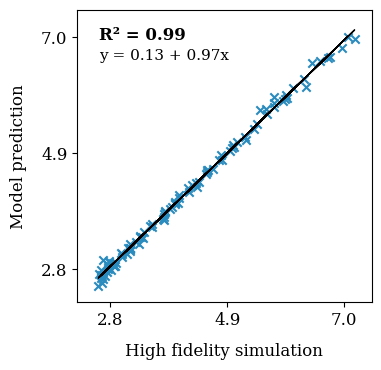

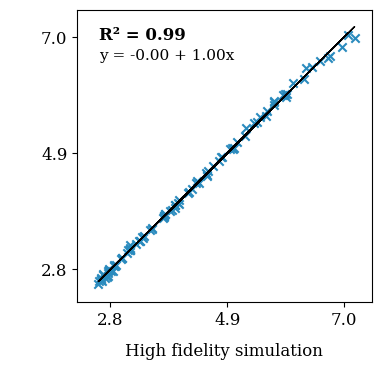

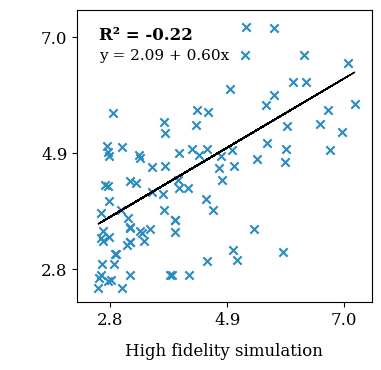

In [ ]:
# Graficos Resistance

# MFGP
plt.figure(figsize=(3.8,3.8))
plt.scatter(Y_hf_100[:,0], hf_R, color = rgba_6, marker = 'x')
plt.xlabel('High fidelity simulation',size = 12,labelpad=10)
plt.ylabel('Model prediction',size = 12, color = 'k',labelpad=10)
#ax2.set_aspect('equal', 'box')
#plt.title("Compliance")
a2, b2 = np.polyfit(Y_hf_100[:,0], hf_R,1)
plt.plot(Y_hf_100[:,0], a2*Y_hf_100[:,0] + b2, color = 'k', linewidth = 1)
plt.text(2.6, 6.6, 'y = ' + '{:.2f}'.format(b2) + ' + {:.2f}'.format(a2) + 'x', size=11)
#plt.text(70, 165, 'm = {:.2f}'.format(a2), size=11)
minor_ticks_left=np.linspace(2.8,7,3)
plt.yticks(minor_ticks_left)
plt.xticks(minor_ticks_left)
plt.xlim(2.2,7.5)
plt.ylim(2.2,7.5)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

r2_r = R2(Y_hf_100[:,0], hf_R)
plt.annotate("R² = {:.2f}".format(0.99),(2.6,6.95),size = si,weight='bold')

#plt.tight_layout() 

#plt.savefig("r2_mfgp.png", dpi=100, bbox_inches='tight')
plt.savefig("r2_mfgp_R.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("r2_nn.png", dpi=100, bbox_inches='tight')

plt.show()



# SFGP
plt.figure(figsize=(3.8,3.8))
plt.scatter(Y_hf_100[:,0], gp_R, color = rgba_6, marker = 'x')
plt.xlabel('High fidelity simulation',size = 12,labelpad=10)
plt.ylabel('Model prediction',size = 12, color = 'white',labelpad=10)
#ax2.set_aspect('equal', 'box')
#plt.title("Compliance")
a2, b2 = np.polyfit(Y_hf_100[:,0], gp_R,1)
plt.plot(Y_hf_100[:,0], a2*Y_hf_100[:,0] + b2, color = 'k', linewidth = 1)
plt.text(2.6, 6.6, 'y = ' + '{:.2f}'.format(b2) + ' + {:.2f}'.format(a2) + 'x', size=11)
#plt.text(70, 165, 'm = {:.2f}'.format(a2), size=11)
minor_ticks_left=np.linspace(2.8,7,3)
plt.yticks(minor_ticks_left)
plt.xticks(minor_ticks_left)
plt.xlim(2.2,7.5)
plt.ylim(2.2,7.5)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

r2_r = R2(Y_hf_100[:,0], gp_R)
plt.annotate("R² = {:.2f}".format(0.99),(2.6, 6.95),size = si,weight='bold')

#plt.tight_layout() 

#plt.savefig("r2_mfgp.png", dpi=100, bbox_inches='tight')
plt.savefig("r2_sfgp_R.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("r2_nn.png", dpi=100, bbox_inches='tight')

plt.show()



# NN
plt.figure(figsize=(3.8,3.8))
plt.scatter(Y_hf_100[:,0], NN_R, color = rgba_6, marker = 'x')
plt.xlabel('High fidelity simulation',size = 12,labelpad=10)
plt.ylabel('Model prediction',size = 12, color = 'white', labelpad=10)
#ax2.set_aspect('equal', 'box')
#plt.title("Compliance")
a2, b2 = np.polyfit(Y_hf_100[:,0], NN_R,1)
plt.plot(Y_hf_100[:,0], a2*Y_hf_100[:,0] + b2, color = 'k', linewidth = 1)
plt.text(2.6, 6.6, 'y = ' + '{:.2f}'.format(b2) + ' + {:.2f}'.format(a2) + 'x', size=11, backgroundcolor='white',alpha=1)
#plt.text(70, 165, 'm = {:.2f}'.format(a2), size=11)
minor_ticks_left=np.linspace(2.8,7,3)
plt.yticks(minor_ticks_left)
plt.xticks(minor_ticks_left)
plt.xlim(2.2,7.5)
plt.ylim(2.2,7.5)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

r2_r = R2(Y_hf_100[:,0], NN_R)
plt.annotate("R² = {:.2f}".format(r2_r),(2.6, 6.95),size = si,weight='bold')

	
#plt.tight_layout() 

#plt.savefig("r2_mfgp.png", dpi=100, bbox_inches='tight')
plt.savefig("r2_NN_R.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("r2_nn.png", dpi=100, bbox_inches='tight')

plt.show()

In [ ]:
# Bland-Altman

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.figure(figsize=(3.8,3.8))
    plt.scatter(mean, diff, *args, **kwargs, marker='x', color = rgba_6)
    plt.axhline(md,           color='k', linestyle='-', label = 'Mean')
    plt.axhline(md + 1.96*sd, color='k', linestyle='--', label = u"\u00B1"'1.96SD')
    plt.axhline(md - 1.96*sd, color='k', linestyle='--')

    return md, sd, mean, CI_low, CI_high

In [ ]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(Y_hf_100[:,1], hf_C)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("Means", size=12, labelpad=10)
plt.ylabel("Difference", size=12, color='k', labelpad=7)
#plt.ylim(md - 4*sd, md + 4*sd)

'''xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*0.95

plt.text(xOutPlot, md - 2.5*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md + 1.4*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md - 0.42*sd, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    size = 11,
    )'''

plt.xticks(np.linspace(70,190,3))
plt.yticks(np.linspace(-28,28,5))
plt.xlim(50,210)
plt.ylim(-35,35)
#plt.subplots_adjust(right=0.85)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)


#plt.legend(bbox_to_anchor=(0.15, 1.1, 1, 0.1), loc="lower left", ncol=2, fancybox = True, mode ='expand', borderaxespad=0, fontsize=12)

plt.savefig("blandaltman_mfgp_c.jpg", dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig("blandaltman_nn.png", dpi=100, bbox_inches='tight')

In [ ]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(Y_hf_100[:,1], gp_C)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("Means", size=12, labelpad=10)
plt.ylabel("Difference", size=12, color='white', labelpad=10)
#plt.ylim(md - 4*sd, md + 4*sd)

'''xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.04

plt.text(xOutPlot, md - 2.5*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md + 1.4*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md - 0.40*sd, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    size = 11,
    )'''

plt.xticks(np.linspace(70,190,3))
plt.yticks(np.linspace(-28,28,5))
plt.xlim(50,210)
plt.ylim(-35,35)
#plt.subplots_adjust(right=0.85)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.savefig("blandaltman_sfgp_c.jpg", dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig("blandaltman_nn.png", dpi=100, bbox_inches='tight')

In [ ]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(Y_hf_100[:,1], NN_C)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("Means", size=12, labelpad=10)
plt.ylabel("Difference", size=12, color='white', labelpad=10)
#plt.ylim(md - 2*sd, md + 2*sd)

'''xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*0.94

plt.text(xOutPlot, md - 2.5*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md + 1.4*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md - 0.4*sd, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    size = 11,
    )'''

plt.xticks(np.linspace(70,190,3))
plt.yticks(np.linspace(-28,28,5))
plt.xlim(50,210)
plt.ylim(-35,35)
#plt.subplots_adjust(right=0.85)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.savefig("blandaltman_nn_c.jpg", dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig("blandaltman_nn.png", dpi=100, bbox_inches='tight')

In [ ]:
def bland_altman_broken(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'height_ratios': [1, 2.3, 1]})
    fig.set_size_inches(3.8, 3.8)
    fig.subplots_adjust(hspace=0.07)  # adjust space between axes
    ax1.scatter(mean, diff, *args, **kwargs, marker='x', color = rgba_6)
    ax1.axhline(md,           color='k', linestyle='-')
    ax1.axhline(md + 1.96*sd, color='k', linestyle='--')
    ax1.axhline(md - 1.96*sd, color='k', linestyle='--')
    ax2.scatter(mean, diff, *args, **kwargs, marker='x', color = rgba_6)
    ax2.axhline(md,           color='k', linestyle='-')
    ax2.axhline(md + 1.96*sd, color='k', linestyle='--')
    ax2.axhline(md - 1.96*sd, color='k', linestyle='--')
    ax3.scatter(mean, diff, *args, **kwargs, marker='x', color = rgba_6)
    ax3.axhline(md,           color='k', linestyle='-')
    ax3.axhline(md + 1.96*sd, color='k', linestyle='--')
    ax3.axhline(md - 1.96*sd, color='k', linestyle='--')
    ax1.set_ylim(0.3*4, 1.3*4)
    ax2.set_ylim(-0.13*4,0.13*4)
    ax3.set_ylim(-1.3*4, -0.3*4)
    ax3.set_xlim(2.2,7.5)
    # hide the spines between ax1 and ax3
    ax1.spines['bottom'].set_visible(True)
    ax1.spines['bottom'].set_alpha(0.2)
    ax2.spines['top'].set_visible(True)
    ax2.spines['top'].set_alpha(0.2)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['bottom'].set_alpha(0.2)
    ax3.spines['top'].set_visible(True)
    ax3.spines['top'].set_alpha(0.2)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False, top = False)  # don't put tick labels at the top
    ax2.tick_params(labelbottom=False, bottom = False)  # don't put tick labels at the top
    ax3.xaxis.tick_bottom()
    # Broken-axis lines
    d = .015
     # Upside
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +3*d), **kwargs, linewidth=1)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +3*d), **kwargs, linewidth=1)  # top-right diagonal
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs, linewidth=1)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, linewidth=1)  # bottom-right diagonal
     # Downside
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs, linewidth=1)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs, linewidth=1)  # top-right diagonal
    kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
    ax3.plot((-d, +d), (1 - 3*d, 1 + d), **kwargs, linewidth=1)  # bottom-left diagonal
    ax3.plot((1 - d, 1 + d), (1 - 3*d, 1 + d), **kwargs, linewidth=1)  # bottom-right diagonal
    # Additional plot configuration
    ax1.set_yticks(np.linspace(3.5,3.5,1))
    ax2.set_yticks(np.linspace(-0.4,0.4,3))
    ax3.set_yticks(np.linspace(-3.5,-3.5,1))
    ax3.set_xticks(np.linspace(2.8, 7, 3))
    
    ax3.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)
    ax3.set_xlabel("Means", size=12, labelpad=10)
    
    fig.text(-0.08, 0.4, "Difference", rotation='vertical', size = 12)

    return md, sd, mean, CI_low, CI_high

In [ ]:
#md, sd, mean, CI_low, CI_high = bland_altman_broken(Y_hf_100[:,0], hf_R)

In [ ]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(Y_hf_100[:,0], hf_R)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("Means", size=12, labelpad=10)
plt.ylabel("Difference", size=12, color='k', labelpad=0)
plt.ylim(md - 4*sd, md + 4*sd)

'''xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.06

plt.text(xOutPlot, md - 2.5*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md + 1.4*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md - 0.42*sd, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    size = 11,
    )'''

plt.xticks(np.linspace(2.8,7,3))
plt.yticks(np.linspace(-0.2*4,0.2*4,5))
plt.xlim(2.2,7.5)
plt.ylim(-0.25*4,0.25*4)
#plt.subplots_adjust(right=0.85)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.savefig("blandaltman_mfgp_r.jpg", dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig("blandaltman_nn.png", dpi=100, bbox_inches='tight')

In [ ]:
#md, sd, mean, CI_low, CI_high = bland_altman_broken(Y_hf_100[:,0], gp_R)

In [ ]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(Y_hf_100[:,0], gp_R)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("Means", size=12, labelpad=10)
plt.ylabel("Difference", size=12, color='white', labelpad=0)
plt.ylim(md - 4*sd, md + 4*sd)

'''xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.11

plt.text(xOutPlot, md - 2.5*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md + 1.4*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md - 0.42*sd, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    size = 11,
    )'''

plt.xticks(np.linspace(2.8,7,3))
plt.yticks(np.linspace(-0.2*4,0.2*4,5))
plt.xlim(2.2,7.5)
plt.ylim(-0.25*4,0.25*4)
#plt.subplots_adjust(right=0.85)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.savefig("blandaltman_sfgp_r.jpg", dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig("blandaltman_nn.png", dpi=100, bbox_inches='tight')

In [ ]:
md, sd, mean, CI_low, CI_high = bland_altman_broken(Y_hf_100[:,0], NN_R)
plt.savefig("blandaltman_nn_r.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(Y_hf_100[:,0], NN_R)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("Means", size=12, labelpad=10)
plt.ylabel("Difference", size=12, color='k', labelpad=10)

'''xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*0.895

plt.text(xOutPlot, md - 2.5*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md + 1.4*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    size = 11,
    )
plt.text(xOutPlot, md - 0.42*sd, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    size = 11,
    )'''

plt.xticks(np.linspace(2.8,5.4,3))
plt.yticks(np.linspace(-0.9,0.9,3))
plt.xlim(2.65,5.6)
plt.ylim(-1.2,1.2)
#plt.subplots_adjust(right=0.85)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.savefig("blandaltman_nn_r.png", dpi=300, bbox_inches='tight')
plt.show()

#plt.savefig("blandaltman_nn.png", dpi=100, bbox_inches='tight')

In [ ]:
RMSE_R_mfgp = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_R_mfgp.npy')
RMSE_C_mfgp= np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_C_mfgp.npy')
std_R_mfgp = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_R_mfgp.npy')
std_C_mfgp = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_C_mfgp.npy')

RMSE_R_sfgp = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_R_sfgp.npy')
RMSE_C_sfgp= np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_C_sfgp.npy')
std_R_sfgp = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_R_sfgp.npy')
std_C_sfgp = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_C_sfgp.npy')

RMSE_R_1_nn = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_R_1_nn.npy')
RMSE_C_1_nn= np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_C_1_nn.npy')
std_R_1_nn = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_R_1_nn.npy')
std_C_1_nn = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_C_1_nn.npy')
RMSE_R_2_nn = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_R_2_nn.npy')
RMSE_C_2_nn= np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/RMSE_C_2_nn.npy')
std_R_2_nn = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_R_2_nn.npy')
std_C_2_nn = np.load('/content/drive/My Drive/Colab Notebooks/UQ Lung/2 Surrogate Modeling/std_C_2_nn.npy')
RMSE_R_nn = np.concatenate((RMSE_R_1_nn, RMSE_R_2_nn), axis=0)
RMSE_C_nn = np.concatenate((RMSE_C_1_nn, RMSE_C_2_nn), axis=0)
std_R_nn = np.concatenate((std_R_1_nn, std_R_2_nn), axis=0)
std_C_nn = np.concatenate((std_C_1_nn, std_C_2_nn), axis=0)

In [ ]:
cmap = plt.cm.get_cmap('Greys')

rgba_1 = cmap(0.99)
rgba_2 = cmap(0.75)
rgba_3 = cmap(0.5)

In [ ]:
cmap_2 = plt.cm.get_cmap('GnBu')

rgba_4 = cmap_2(0.99)
rgba_5 = cmap_2(0.75)
rgba_6 = cmap_2(0.5)

In [ ]:
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 3.8)
fig.tight_layout()

#ax1.plot(np.arange(10,20),RMSE_C_mfgp, marker = 'o', color = 'k', mfc='none', markersize = 7, label = 'Multi-fidelity GP')
#ax1.plot(np.arange(10,20),RMSE_C_sfgp, marker = 'o', color = 'k', label = 'Single-fidelity GP')
#ax1.plot(np.arange(10,20),RMSE_C_nn, marker = 'x', color = 'k', label = 'Neural Network')
#ax1.fill_between(np.arange(10,20),np.asarray(RMSE_C_mfgp) - np.asarray(std_C_mfgp)/np.sqrt(1),np.asarray(RMSE_C_mfgp) + np.asarray(std_C_mfgp)/np.sqrt(1),alpha=.1, color = 'k')
#ax1.fill_between(np.arange(10,20),np.asarray(RMSE_C_sfgp) - np.asarray(std_C_sfgp)/np.sqrt(1),np.asarray(RMSE_C_sfgp) + np.asarray(std_C_sfgp)/np.sqrt(1),alpha=.1, color = 'k')
#ax1.fill_between(np.arange(10,20),np.asarray(RMSE_C_nn) - np.asarray(std_C_nn)/np.sqrt(1),np.asarray(RMSE_C_nn) + np.asarray(std_C_nn)/np.sqrt(1),alpha=.1, color = 'k')
ax1.errorbar(np.arange(10,20),RMSE_C_mfgp, np.asarray(std_C_mfgp), linestyle='dashed', marker = 's', markersize = 7, capsize = 3, label = 'Multi-fidelity GP', color = rgba_4)
ax1.errorbar(np.arange(10,20),RMSE_C_sfgp, np.asarray(std_C_sfgp), linestyle='dashed', marker = 'o', markersize = 7, capsize = 4, label = 'Single-fidelity GP', color = rgba_5)
ax1.errorbar(np.arange(10,20),RMSE_C_nn, np.asarray(std_C_nn), linestyle='dashed', marker = '^', markersize = 7, capsize = 6, capthick=1, label = 'Neural Network', color = rgba_6)
ax1.set_xticks(np.linspace(10,19,4))
ax1.set_yticks(np.linspace(0,26,3))
ax1.set_xlim(9.7,19.3)
ax1.set_ylim(0,26)
ax1.set_ylabel("$\mathregular{C_{rs}}$  RMSE" "\n" "(ml/cm $H_20$)", size = 12, labelpad = 5)
ax1.set_xlabel('Training Size', size = 12, labelpad = 5)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

#ax2.plot(np.arange(10,20),RMSE_R_mfgp, marker = 'o', color = 'k', mfc='none', markersize = 7)
#ax2.plot(np.arange(10,20),RMSE_R_sfgp, marker = 'o', color = 'k')
#ax2.plot(np.arange(10,20),RMSE_R_nn, marker = 'x', color = 'k')
#ax2.fill_between(np.arange(10,20),np.asarray(RMSE_R_mfgp) - np.asarray(std_R_mfgp)/np.sqrt(1),np.asarray(RMSE_R_mfgp) + np.asarray(std_R_mfgp)/np.sqrt(1),alpha=.1, color = 'k')
#ax2.fill_between(np.arange(10,20),np.asarray(RMSE_R_sfgp) - np.asarray(std_R_sfgp)/np.sqrt(1),np.asarray(RMSE_R_sfgp) + np.asarray(std_R_sfgp)/np.sqrt(1),alpha=.1, color = 'k')
#ax2.fill_between(np.arange(10,20),np.asarray(RMSE_R_nn) - np.asarray(std_R_nn)/np.sqrt(1),np.asarray(RMSE_R_nn) + np.asarray(std_R_nn)/np.sqrt(1),alpha=.1, color = 'k')
#ax2 = brokenaxes(ylims=((0, 0.1), (0.6, 1.5)), hspace=.05, axes = ax2)
ax2.errorbar(np.arange(10,20),RMSE_R_mfgp, np.asarray(std_R_mfgp), linestyle='dashed', marker = 's', capsize = 3, color = rgba_1)
ax2.errorbar(np.arange(10,20),RMSE_R_sfgp, np.asarray(std_R_sfgp), linestyle='dashed', marker = 'o', capsize = 4, color = rgba_2)
ax2.errorbar(np.arange(10,20),RMSE_R_nn, np.asarray(std_R_nn), linestyle='dashed', marker = '^', capsize = 6, color = rgba_3)
ax2.set_xticks(np.linspace(10,19,4))
ax2.set_yticks(np.linspace(0,1.5,3))
ax2.set_xlim(9.7,19.3)
ax2.set_ylim(0,1.5)
ax2.set_ylabel("$\mathregular{R}$  RMSE" "\n" "(cm $H_20$ L/s)", size = 12, labelpad = 5)
ax2.set_xlabel('Training Size', size = 12, labelpad = 5)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

fig.legend(bbox_to_anchor=(0.15, 1.0, 0.7525, 0.1), loc="lower left", ncol=3, fancybox = True, mode ='expand', borderaxespad=0, fontsize=12)

plt.subplots_adjust(wspace=0.4)

#plt.tight_layout() 
plt.show()
plt.draw()

fig.savefig("rmse.jpg", bbox_inches='tight', dpi=300)

In [ ]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(5.4, 3.65)
fig.tight_layout()

#ax1.plot(np.arange(10,20),RMSE_C_mfgp, marker = 'o', color = 'k', mfc='none', markersize = 7, label = 'Multi-fidelity GP')
#ax1.plot(np.arange(10,20),RMSE_C_sfgp, marker = 'o', color = 'k', label = 'Single-fidelity GP')
#ax1.plot(np.arange(10,20),RMSE_C_nn, marker = 'x', color = 'k', label = 'Neural Network')
#ax1.fill_between(np.arange(10,20),np.asarray(RMSE_C_mfgp) - np.asarray(std_C_mfgp)/np.sqrt(1),np.asarray(RMSE_C_mfgp) + np.asarray(std_C_mfgp)/np.sqrt(1),alpha=.1, color = 'k')
#ax1.fill_between(np.arange(10,20),np.asarray(RMSE_C_sfgp) - np.asarray(std_C_sfgp)/np.sqrt(1),np.asarray(RMSE_C_sfgp) + np.asarray(std_C_sfgp)/np.sqrt(1),alpha=.1, color = 'k')
#ax1.fill_between(np.arange(10,20),np.asarray(RMSE_C_nn) - np.asarray(std_C_nn)/np.sqrt(1),np.asarray(RMSE_C_nn) + np.asarray(std_C_nn)/np.sqrt(1),alpha=.1, color = 'k')
ax1.errorbar(np.arange(10,20),RMSE_C_mfgp, np.asarray(std_C_mfgp), linestyle='dashed', elinewidth=1, marker = 's', markersize = 7, capsize = 3, label = 'Multi-fidelity GP', color = rgba_4, zorder = 10)
ax1.errorbar(np.arange(10,20),RMSE_C_sfgp, np.asarray(std_C_sfgp), linestyle='dashed', elinewidth=1.5, marker = 'o', markersize = 7, capsize = 4, label = 'Single-fidelity GP', color = rgba_5, zorder = 5)
ax1.errorbar(np.arange(10,20),RMSE_C_nn, np.asarray(std_C_nn), linestyle='dashed', elinewidth=2, marker = '^', markersize = 7, capsize = 6, capthick=1, label = 'Neural Network', color = rgba_6, zorder = 0)
ax1.set_xticks(np.linspace(10,19,4))
ax1.set_yticks(np.linspace(0,26,3))
ax1.set_xlim(9.7,19.3)
ax1.set_ylim(0,26)
ax1.set_ylabel("$\mathregular{C_{rs}}$ RMSE (ml/cm $\mathregular{H_2O}$)", size = 12, labelpad = 8)
ax1.set_xlabel('Training Size', size = 12, labelpad = 8)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

#plt.tight_layout() 
plt.show()
plt.draw()

fig.savefig("rmse_c.jpg", bbox_inches='tight', dpi=300)

In [ ]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharex = True)
fig.set_size_inches(5.46, 4)

ax1.errorbar(np.arange(10,20),RMSE_R_mfgp, np.asarray(std_R_mfgp), linestyle='dashed', elinewidth=1, marker = 's', markersize = 7, capsize = 3, color = rgba_4)
ax1.errorbar(np.arange(10,20),RMSE_R_sfgp, np.asarray(std_R_sfgp), linestyle='dashed', elinewidth=1.5, marker = 'o', markersize = 7, capsize = 4, color = rgba_5)
ax1.errorbar(np.arange(10,20),RMSE_R_nn, np.asarray(std_R_nn), linestyle='dashed', elinewidth=2, marker = '^', markersize = 7, capsize = 6, color = rgba_6)
ax2.errorbar(np.arange(10,20),RMSE_R_mfgp, np.asarray(std_R_mfgp), linestyle='dashed', elinewidth=1, marker = 's', markersize = 7, capsize = 3, color = rgba_4)
ax2.errorbar(np.arange(10,20),RMSE_R_sfgp, np.asarray(std_R_sfgp), linestyle='dashed', elinewidth=1.5, marker = 'o', markersize = 7, capsize = 4, color = rgba_5)
ax2.errorbar(np.arange(10,20),RMSE_R_nn, np.asarray(std_R_nn), linestyle='dashed', elinewidth=2, marker = '^', markersize = 7, capsize = 8, color = rgba_6)

ax2.set_xticks(np.linspace(10,19,4))
ax1.set_yticks(np.linspace(.75,1.5,2))
ax2.set_yticks(np.linspace(0,.05,2))
#ax2.set_xlim(9.7,19.3)
ax1.set_ylim(0.5, 1.5)
ax2.set_ylim(0,0.06)
#fig.supylabel("$\mathregular{R}$  RMSE" "\n" "(cm $H_20$ L/s)", size = 12)
fig.text(-0.03, 0.33, "$\mathregular{R}$  RMSE (cm $\mathregular{H_2O}$ L/s)", rotation='vertical', size = 12)
ax2.set_xlabel('Training Size', size = 12, labelpad = 8)
ax2.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False, top = False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs, linewidth=1)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs, linewidth=1)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs, linewidth=1)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, linewidth=1)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
#plt.subplots_adjust(wspace=0.4)

plt.tight_layout() 
plt.show()
plt.draw()

fig.savefig("rmse_r.jpg", bbox_inches='tight', dpi=300)